# IoT cyber attack Analysis - UNSW NB15 dataset

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import warnings

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Loading the data

In [77]:
initial_data = pd.read_csv('UNSW_NB15_training.csv')
initial_data.shape

(175341, 45)

In [80]:
initial_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
data_features = pd.read_csv('UNSW_NB15_features.csv')
data_features.head(50)

,Name,Type,Description
0,srcip,nominal,Source IP address
1,sport,integer,Source port number
2,dstip,nominal,Destination IP address
3,dsport,integer,Destination port number
4,proto,nominal,Transaction protocol
5,state,nominal,Indicates to the state and its dependent proto...
6,dur,Float,Record total duration
7,sbytes,Integer,Source to destination transaction bytes
8,dbytes,Integer,Destination to source transaction bytes
9,sttl,Integer,Source to destination time to live value


In [4]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
initial_data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


### Data Pre processing

In [6]:
# check if there are Null values
initial_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [7]:
# Discard the rows with missing values
data_to_use = initial_data.dropna()

# Discard unnessary coloumns
data_to_use = initial_data.drop(axis=1, columns=['id','proto','service','state'])

data_to_use.shape

(175341, 41)

### Splitting X and y

In [8]:
X = data_to_use.drop(axis=1, columns=['attack_cat']) 
X = X.drop(axis=1, columns=['label'])

y1 = data_to_use['attack_cat'].values
y2 = data_to_use['label'].values

In [9]:
# Calculate Y2 ratio
def data_ratio(y2):
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

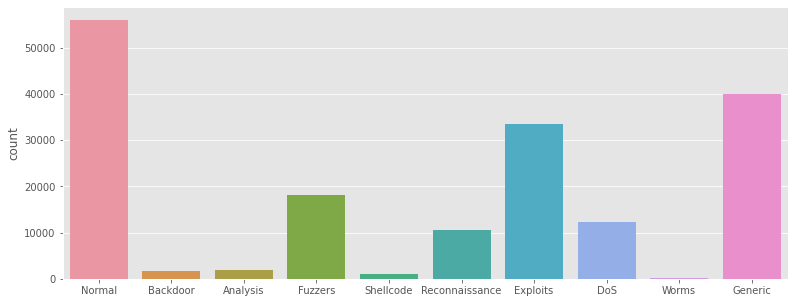

The class ratio for the original data: 0.5:1 (56000/119341)


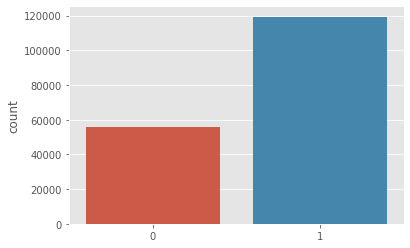

In [10]:
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(13,5))
sns.countplot(y1,label="Sum")
#sns.countplot(y1)

plt.show()

print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()

In [11]:
## Split data 

In [12]:
# Load test data
test_data = pd.read_csv('UNSW_NB15_testing.csv')
X_test = test_data.drop(axis=1, columns=['attack_cat']) # X_test is a dataframe
X_test = X_test.drop(axis=1, columns=['label'])

y1_test = test_data['attack_cat'].values # y is an array
y2_test = test_data['label'].values
X_train = X
y1_train = y1
y2_train = y2

In [13]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [14]:
numerical_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [15]:
categorical_cols

Index([], dtype='object')

### Transforming X 

In [16]:
# transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

col_trans.fit(X_train)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index([], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))])

In [17]:
X_train_transform = col_trans.transform(X_train)
X_train_transform.shape

(175341, 39)

In [18]:
X_test_transform = col_trans.transform(X_test)
X_test_transform.shape

(82332, 39)

### Transform Y

#### y1

In [19]:
pd.unique(y1)

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [20]:
target_trans = LabelEncoder()
target_trans.fit(y1_train)
y1_train_transform = target_trans.transform(y1_train)
y1_test_transform = target_trans.transform(y1_test)

In [21]:
y1_train_transform

array([6, 6, 6, ..., 5, 5, 5])

#### y2

In [23]:
pd.unique(y2)

array([0, 1], dtype=int64)

In [24]:
target_trans = LabelEncoder()
target_trans.fit(y2_train)
y2_train_transform = target_trans.transform(y2_train)
y2_test_transform = target_trans.transform(y2_test)

In [25]:
y2_train_transform

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Fitting ML model

#### Target y2 - Attack or normal response

In [26]:
#logistic regression classifier
LR = LogisticRegression()

LR.fit(X_train_transform, y2_train_transform)

y_pred_LR = LR.predict(X_test_transform)

# accuracy of the classifier
accuracy = accuracy_score(y2_test_transform, y_pred_LR)
print("Accuracy:", accuracy)
f1 = f1_score(y2_test_transform, y_pred_LR)
print("F1 score:", f1)

Accuracy: 0.7771826264392946
F1 score: 0.8236685025519768


C:\Users\sheri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
# Naive Bayes classifier
NB = GaussianNB()

NB.fit(X_train_transform, y2_train_transform)

y_pred_NB = NB.predict(X_test_transform)

# accuracy of the classifier
accuracy = accuracy_score(y2_test_transform, y_pred_NB)
print("Accuracy:", accuracy)
f1 = f1_score(y2_test_transform, y_pred_NB)
print("F1 score:", f1)

Accuracy: 0.73311713550017
F1 score: 0.7893187592885567


In [28]:
# Decision tree classifier
DT = DecisionTreeClassifier()

DT.fit(X_train_transform, y2_train_transform)

y_pred_DT = DT.predict(X_test_transform)

# accuracy of the classifier
accuracy = accuracy_score(y2_test_transform, y_pred_DT)
print("Accuracy:", accuracy)
f1 = f1_score(y2_test_transform, y_pred_DT)
print("F1 score:", f1)

Accuracy: 0.8634431326823107
F1 score: 0.8853024290217603


In [63]:
# Random Forest classifier
RR = RandomForestClassifier()

RR.fit(X_train_transform, y2_train_transform)

y_pred_RR = RR.predict(X_test_transform)

# accuracy of the classifier
accuracy = accuracy_score(y2_test_transform, y_pred_RR)
print("Accuracy:", accuracy)
f1 = f1_score(y2_test_transform, y_pred_RR)
print("F1 score:", f1)

Accuracy: 0.8723096730311422
F1 score: 0.8946962488105374


#### Target y1 - Classification of type of attack

In [30]:
# Decision tree classifier
DT = DecisionTreeClassifier()

DT.fit(X_train_transform, y1_train_transform)

y1_pred_DT = DT.predict(X_test_transform)

# accuracy of the classifier
accuracy = accuracy_score(y1_test_transform, y1_pred_DT)
print("Accuracy:", accuracy)
f1 = f1_score(y1_test_transform, y1_pred_DT,average='weighted')
print("F1 score:", f1)

Accuracy: 0.737890492153719
F1 score: 0.7628447880710836


In [31]:
# Random Forest classifier
RR = RandomForestClassifier()

RR.fit(X_train_transform, y1_train_transform)

y1_pred_RR = RR.predict(X_test_transform)

# accuracy of the classifier
accuracy = accuracy_score(y1_test_transform, y1_pred_RR)
print("Accuracy:", accuracy)
f1 = f1_score(y1_test_transform, y1_pred_RR,average='weighted')
print("F1 score:", f1)

Accuracy: 0.756716707962882
F1 score: 0.7780102722301491


### Freature importance

In [64]:
cols = X_train.columns
cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [65]:
importances = RR.feature_importances_
#cols = X_train.columns

# print the feature importance scores
for i, importance in enumerate(importances):
    print("Feature [{}] : {:.3f}".format(cols[i], importance))

Feature [dur] : 0.036
Feature [spkts] : 0.009
Feature [dpkts] : 0.028
Feature [sbytes] : 0.035
Feature [dbytes] : 0.021
Feature [rate] : 0.036
Feature [sttl] : 0.189
Feature [dttl] : 0.044
Feature [sload] : 0.046
Feature [dload] : 0.057
Feature [sloss] : 0.007
Feature [dloss] : 0.007
Feature [sinpkt] : 0.019
Feature [dinpkt] : 0.017
Feature [sjit] : 0.011
Feature [djit] : 0.011
Feature [swin] : 0.004
Feature [stcpb] : 0.008
Feature [dtcpb] : 0.007
Feature [dwin] : 0.001
Feature [tcprtt] : 0.028
Feature [synack] : 0.029
Feature [ackdat] : 0.030
Feature [smean] : 0.033
Feature [dmean] : 0.044
Feature [trans_depth] : 0.001
Feature [response_body_len] : 0.002
Feature [ct_srv_src] : 0.020
Feature [ct_state_ttl] : 0.130
Feature [ct_dst_ltm] : 0.007
Feature [ct_src_dport_ltm] : 0.006
Feature [ct_dst_sport_ltm] : 0.008
Feature [ct_dst_src_ltm] : 0.022
Feature [is_ftp_login] : 0.000
Feature [ct_ftp_cmd] : 0.000
Feature [ct_flw_http_mthd] : 0.002
Feature [ct_src_ltm] : 0.007
Feature [ct_srv_dst]

In [67]:
# select the top 15 features
top_indices = importances.argsort()[::-1][:20]

print("Top 20 feature indices:")    #, top_indices)
print(cols[top_indices],end = ",")

Top 20 feature indices:
Index(['sttl', 'ct_state_ttl', 'dload', 'sload', 'dmean', 'dttl', 'dur',
       'rate', 'sbytes', 'smean', 'ct_srv_dst', 'ackdat', 'synack', 'dpkts',
       'tcprtt', 'ct_dst_src_ltm', 'dbytes', 'ct_srv_src', 'sinpkt', 'dinpkt'],
      dtype='object'),

#### Transforming X with important features

In [68]:
# X_train_fi = X[['sttl', 'ct_state_ttl', 'dload', 'dttl', 'tcprtt', 'sload', 'dmean','sbytes', 'ackdat', 'dbytes', 'rate', 
#                'synack', 'ct_srv_dst', 'smean','dinpkt']]
# X_test_fi = X_test[['sttl', 'ct_state_ttl', 'dload', 'dttl', 'tcprtt', 'sload', 'dmean','sbytes', 'ackdat', 'dbytes', 'rate', 
#                'synack', 'ct_srv_dst', 'smean','dinpkt']]

X_train_fi = X[['sttl', 'ct_state_ttl', 'dload', 'sload', 'dmean', 'dttl', 'dur',
       'rate', 'sbytes', 'smean', 'ct_srv_dst', 'ackdat', 'synack', 'dpkts',
       'tcprtt', 'ct_dst_src_ltm', 'dbytes', 'ct_srv_src', 'sinpkt', 'dinpkt']]
X_test_fi = X_test[['sttl', 'ct_state_ttl', 'dload', 'sload', 'dmean', 'dttl', 'dur',
       'rate', 'sbytes', 'smean', 'ct_srv_dst', 'ackdat', 'synack', 'dpkts',
       'tcprtt', 'ct_dst_src_ltm', 'dbytes', 'ct_srv_src', 'sinpkt', 'dinpkt']]

In [69]:
numerical_cols = X_train_fi.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train_fi.select_dtypes(include=['object', 'bool']).columns

In [70]:
numerical_cols

Index(['sttl', 'ct_state_ttl', 'dload', 'sload', 'dmean', 'dttl', 'dur',
       'rate', 'sbytes', 'smean', 'ct_srv_dst', 'ackdat', 'synack', 'dpkts',
       'tcprtt', 'ct_dst_src_ltm', 'dbytes', 'ct_srv_src', 'sinpkt', 'dinpkt'],
      dtype='object')

In [71]:
categorical_cols

Index([], dtype='object')

In [72]:
# transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

col_trans.fit(X_train_fi)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index([], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['sttl', 'ct_state_ttl', 'dload', 'sload', 'dmean', 'dttl', 'dur',
       'rate', 'sbytes', 'smean', 'ct_srv_dst', 'ackdat', 'synack', 'dpkts',
       'tcprtt', 'ct_dst_src_ltm', 'dbytes', 'ct_srv_src', 'sinpkt', 'dinpkt'],
      dtype='object'))])

In [73]:
X_train_transform_fi = col_trans.transform(X_train_fi)
X_train_transform_fi.shape

(175341, 20)

In [74]:
X_test_transform_fi = col_trans.transform(X_test_fi)
X_test_transform_fi.shape

(82332, 20)

#### Re modelling - target y2

In [75]:
# Random Forest classifier
RR = RandomForestClassifier()

RR.fit(X_train_transform_fi, y2_train_transform)

y_pred_RR = RR.predict(X_test_transform_fi)

# accuracy of the classifier
accuracy = accuracy_score(y2_test_transform, y_pred_RR)
print("Accuracy:", accuracy)
f1 = f1_score(y2_test_transform, y_pred_RR)
print("F1 score:", f1)

Accuracy: 0.8709371811689258
F1 score: 0.8931931489224832


#### Re modelling - target y1

In [76]:
# Random Forest classifier
RR = RandomForestClassifier()

RR.fit(X_train_transform_fi, y1_train_transform)

y1_pred_RR = RR.predict(X_test_transform_fi)

# accuracy of the classifier
accuracy = accuracy_score(y1_test_transform, y1_pred_RR)
print("Accuracy:", accuracy)
f1 = f1_score(y1_test_transform, y1_pred_RR,average='weighted')
print("F1 score:", f1)

Accuracy: 0.7647694699509304
F1 score: 0.776184773996498


### Conclusion